<a href="https://colab.research.google.com/github/vvnjin/community-wellness-dashboard/blob/main/school_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is for calculating school quality metrics: Fraser score and school capacity.

Aggregated scores are exported to the Community Wellness Dashboard - Dfg Google Drive.

Originally written in R by: Emilie Mallia

Adapted for python by: Vivian Jin

## Set up GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

drive_path = '/content/gdrive/MyDrive/Colab Notebooks/Source Data'
drive_contents = os.listdir(drive_path)

# Find the shared drives
shared_drives = [item for item in drive_contents]
print("Shared Drives:", shared_drives)


Shared Drives: ['01 - Geographic', '02 - Education', '03 - Population']


In [ ]:
import pandas as pd

## Read in relevant files

### 1. School capacities (Source: Vik Khanna)

In [ ]:
school_capacities_file = '/content/gdrive/MyDrive/Colab Notebooks/Source Data/02 - Education/All Schools 2022 and 2021 Ministry Enrolment Data [VSB Forecast Data] (Vik Khanna).xlsx'

school_capacities_sheets = pd.read_excel(school_capacities_file, sheet_name=None)
print("number of sheets: ", len(school_capacities_sheets))

for index, sheet in enumerate(school_capacities_sheets):
  sheet_name = sheet.lower().replace(" ", "_").replace('&', 'and')
  print(sheet_name)
  globals()[f"{sheet_name}"] = pd.read_excel(school_capacities_file, sheet_name=index)

number of sheets:  6
vsb_schools_master_sheet
private_and_public_schools
vsb_secondary_forecast
vsb_elementary_forecast
ministry_forecast
master_ministry_data_with_addre


In [ ]:
print(private_and_public_schools.columns)
capacity_sheet_1_df = vsb_schools_master_sheet.rename(columns={"2022 Capacity":"school_capacity_%", "Full Name":"school_name"})
capacity_sheet_2_df = private_and_public_schools.rename(columns={"2022 Utilization":"school_capacity_%", "School Name":"school_name"})
capacity_sheet_2_df= capacity_sheet_2_df[~capacity_sheet_2_df['school_capacity_%'].isna()][["school_name", "school_capacity_%"]]
capacity_sheet_1_df = capacity_sheet_1_df[["school_name", "school_capacity_%"]]

capacity_sheet_1_df["school_capacity_%"] = pd.to_numeric(capacity_sheet_1_df["school_capacity_%"], errors='coerce')
capacity_sheet_1_df["school_capacity_%"] = capacity_sheet_1_df["school_capacity_%"] * 100
capacity_sheet_2_df["school_capacity_%"] = capacity_sheet_2_df["school_capacity_%"] * 100

capacity_sheet_1_df = capacity_sheet_1_df[~capacity_sheet_1_df['school_capacity_%'].isna()][:-1] #Remove nulls and skip last row with Totals
schools_capacity_df = pd.concat([capacity_sheet_1_df, capacity_sheet_2_df]).drop_duplicates(subset='school_name', keep='first').reset_index(drop=True)
schools_capacity_df

Index(['District Number', 'School Code', 'School Name', 'School Category',
       '2022 Enrolment', '2021 Enrolment', 'Address', 'City', 'Province',
       'Postal Code', 'Principal Title', 'Principal First name',
       'Principal Last Name', 'Type', 'Grade Range', 'School Category.1',
       'Capacity', '2022 Utilization', 'Growth # 21/22', 'Growth Percent',
       'Unnamed: 20'],
      dtype='object')


,school_name,school_capacity_%
0,Crosstown Elementary,100.000000
1,Britannia Community Secondary,60.000000
2,Admiral Seymour Elementary,37.000000
3,Britannia Community Elementary,107.000000
4,Lord Strathcona Community Elementary,100.000000
...,...,...
128,St Francis of Assisi,96.818182
129,St Anthony of Padua,96.363636
130,St Jude's,93.636364
131,Sir Matthew Begbie Elementary,106.188925


### 2. Fraser Institute School Quality and Rankings

In [ ]:
fraser_school_rankings_file = '/content/gdrive/MyDrive/Colab Notebooks/Source Data/02 - Education/Fraser Institute Data V1.xlsx' #This file was created by copy pasting from the Fraser Insitute rankings website
fraser_school_rankings_sheets = pd.read_excel(fraser_school_rankings_file, sheet_name=None)

print("number of sheets: ", len(fraser_school_rankings_sheets))

for index, sheet in enumerate(fraser_school_rankings_sheets):
  sheet_name = sheet.lower().replace(" ", "_")
  print(sheet_name)
  globals()[f"{sheet_name}_sheet"] = pd.read_excel(fraser_school_rankings_file, sheet_name=index)


number of sheets:  3
elementary_schools
secondary_schools
appendix_faq


#### Clean up the files

In [ ]:
print(elementary_schools_sheet.columns)

elementary_schools_sheet = elementary_schools_sheet.rename(columns={"School Namekeyboard_arrow_down":"school_name", "Score 2021 - 22keyboard_arrow_downhelp":"Fraser_score"})

elementary_schools_sheet = elementary_schools_sheet[["school_name", "Fraser_score"]][1:] #skip first blank row

for index, row in elementary_schools_sheet.iterrows():
  if 'Elementary' not in row['school_name']:
    elementary_schools_sheet.loc[index, 'school_name'] = row['school_name'] + ' Elementary'


secondary_schools_sheet.columns = ["school_name", "Fraser_score", "ranking", "city", 'URL']
secondary_schools_sheet = secondary_schools_sheet[["school_name", "Fraser_score"]]

for index, row in secondary_schools_sheet.iterrows():
  if not row['school_name'].endswith('Secondary'):
    secondary_schools_sheet.loc[index, 'school_name'] = row['school_name'] + ' Secondary'


Index(['School Namekeyboard_arrow_down',
       'Score 2021 - 22keyboard_arrow_downhelp',
       'Rank 2021 - 22keyboard_arrow_down', 'Citykeyboard_arrow_down', 'URL',
       'Notify mehelp'],
      dtype='object')


In [ ]:
schools_Fraser_scores_df = pd.concat([elementary_schools_sheet, secondary_schools_sheet], ignore_index=True)

schools_Fraser_scores_df["Fraser_score"] = pd.to_numeric(schools_Fraser_scores_df["Fraser_score"], errors='coerce')
schools_Fraser_scores_df.sort_values(by='school_name')

,school_name,Fraser_score
37,Anne-Hebert Elementary,5.7
38,Blessed Sacrament School Elementary,8.6
39,Captain James Cook Elementary,4.6
40,Carnarvon Community Elementary,6.0
41,Charles Dickens Elementary,6.4
...,...,...
103,West Point Grey Secondary,10.0
104,Westside Preparatory Secondary,4.5
105,Windermere Secondary,5.8
36,York House School Elementary,10.0



## Join dfs

In [ ]:
print("Num schools with capacity: ", len(schools_capacity_df))
print("Num schools with Fraser score: ", len(schools_Fraser_scores_df))
schools_with_Fraser_score_and_capacity_df = pd.merge(schools_capacity_df, schools_Fraser_scores_df, on='school_name', how='inner')
outer_joined_schools_df = pd.merge(schools_capacity_df, schools_Fraser_scores_df, on='school_name', how='outer')
print("Num schools with capacity and Fraser score: ", len(schools_with_Fraser_score_and_capacity_df))
print("Num rows after outer join:  ", len(outer_joined_schools_df))

schools_with_Fraser_score_and_capacity_df


Num schools with capacity:  133
Num schools with Fraser score:  107
Num schools with capacity and Fraser score:  64
Num rows after outer join:   176


,school_name,school_capacity_%,Fraser_score
0,Crosstown Elementary,100.000000,5.3
1,Sir James Douglas Elementary,104.000000,4.6
2,David Thompson Secondary,66.000000,7.1
3,David Oppenheimer Elementary,110.000000,7.0
4,Sir Sandford Fleming Elementary,105.000000,4.8
...,...,...,...
59,Norma Rose Point Elementary Junior,96.000000,7.6
60,Vancouver Technical Secondary,94.000000,5.8
61,Nootka Community Elementary,81.000000,4.9
62,Vancouver Talmud Torah Elementary,83.800000,8.0


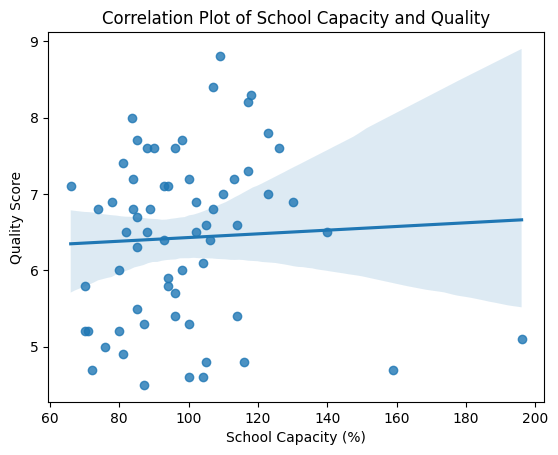

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line and correlation coefficient
sns.regplot(x='school_capacity_%', y='Fraser_score', data=schools_with_Fraser_score_and_capacity_df)

# Add labels and a title
plt.xlabel('School Capacity (%)')
plt.ylabel('Quality Score')
plt.title('Correlation Plot of School Capacity and Quality')

# Show the plot
plt.show()

## Read the schools and electoral areas data

In [ ]:
schools_file = '/content/gdrive/MyDrive/Colab Notebooks/Intermediate Data/02 - Education/schools_with_electoral_area_and_geopoints.csv'

schools_df = pd.read_csv(schools_file)
schools_df = schools_df.rename(columns={'SCHOOL_NAME':'school_name'})

print("Num VSB schools: ", len(schools_df))
schools_df

Num VSB schools:  174


,Unnamed: 0,ADDRESS,SCHOOL_CATEGORY,school_name,Geom,Geo Local Area,geo_point_2d,geopoints,electoral_area
0,0,1110 Cotton Drive,Public School,Britannia Community Elementary,"{""coordinates"": [-123.07137879542154, 49.27451...",Grandview-Woodland,"49.27451200859733, -123.07137879542154",POINT (-123.07137879542154 49.27451200859733),Vancouver-Strathcona
1,1,7835 Champlain Crescent,Public School,Champlain Heights Annex,"{""coordinates"": [-123.03054968939806, 49.21407...",Killarney,"49.2140784317513, -123.03054968939806",POINT (-123.03054968939806 49.2140784317513),Vancouver-Fraserview
2,3,3877 Glen Drive,Public School,Charles Dickens Annex,"{""coordinates"": [-123.08271031, 49.25021306106...",Kensington-Cedar Cottage,"49.2502130610676, -123.08271031",POINT (-123.08271031 49.2502130610676),Vancouver-Kensington
3,4,3200 W 41st Av,Independent School,Crofton House,"{""coordinates"": [-123.17721815907593, 49.23367...",Kerrisdale,"49.233677833584544, -123.17721815907593",POINT (-123.17721815907593 49.233677833584544),Vancouver-Quilchena
4,5,315 E 23rd Av,Public School,David Livingstone Elementary,"{""coordinates"": [-123.09798144, 49.25075333606...",Riley Park,"49.2507533360676, -123.09798144",POINT (-123.09798144 49.2507533360676),Vancouver-Little Mountain
...,...,...,...,...,...,...,...,...,...
169,189,1545 W 62nd Av,Independent School,Vancouver Hebrew Academy,"{""coordinates"": [-123.1413692647842, 49.215471...",Marpole,"49.21547172757715, -123.1413692647842",POINT (-123.1413692647842 49.21547172757715),Vancouver-Langara
170,190,8650 Barnard St,Independent School,Vancouver Montessori School,"{""coordinates"": [-123.14463359946043, 49.20779...",Marpole,"49.20779039590787, -123.14463359946043",POINT (-123.14463359946043 49.20779039590787),Vancouver-Langara
171,191,1000 E 59th Av,Public School,Walter Moberly Elementary,"{""coordinates"": [-123.08434542, 49.21610923006...",Sunset,"49.216109230067424, -123.08434542",POINT (-123.08434542 49.216109230067424),Vancouver-Langara
172,192,3075 Slocan St,Independent School,Westside Montessori Academy,"{""coordinates"": [-123.0503919492473, 49.256937...",Renfrew-Collingwood,"49.256937847571606, -123.0503919492473",POINT (-123.0503919492473 49.256937847571606),Vancouver-Renfrew


## Attempt to match Fraser schools and capacity schools with VSB school list

In [ ]:
def find_row_with_most_matches(df1, df2):
    results = []

    for index, row1 in df1.iterrows():
        max_matched_words_count = 0
        matching_row_index = 0

        for index2, row2 in df2.iterrows():
            matched_words_count = len(set(row1['school_name'].replace("Elementary", "").replace("Secondary", "").split()).intersection(set(row2['school_name'].replace("Elementary", "").replace("Secondary", "").split())))
            #matched_words_count = len(set(row1['school_name'].split()).intersection(set(row2['school_name'].split())))

            if matched_words_count > max_matched_words_count:
                max_matched_words_count = matched_words_count
                matching_row_index = index2

        results.append({'school_name': df1.loc[index, 'school_name'], 'matched_VSB_school': df2.loc[ matching_row_index, 'school_name'], 'matched_words_in_names': max_matched_words_count})

    result_df = pd.DataFrame(results)
    return result_df

Fraser_schools_matched_df = find_row_with_most_matches(schools_Fraser_scores_df, schools_df)
Fraser_schools_matched_df

,school_name,matched_VSB_school,matched_words_in_names
0,Quilchena Elementary,Quilchena Elementary,1
1,Rose-des-vents Elementary,Britannia Community Elementary,0
2,Shaughnessy Elementary,Shaughnessy Elementary,1
3,Simon Fraser Elementary,Simon Fraser Elementary,2
4,Sir Alexander Mackenzie Elementary,Sir Alexander Mackenzie Elementary,3
...,...,...,...
102,Vancouver Technical Secondary,Vancouver Technical Secondary,2
103,West Point Grey Secondary,West Point Grey Academy,3
104,Westside Preparatory Secondary,Westside Montessori,1
105,Windermere Secondary,Windermere Community Secondary,1


## Manually check for Fraser list schools that were not matched correctly:

- Rose-des-vents Elementary - not in VSB list
- Anne-Hebert Elementary	- not in VSB list
- St Patrick's Secondary	- should match St Patrick Regional Secondary
- University Hill Secondary	- not in VSB list
- York House Secondary	- should match York House School


In [ ]:
## Make changes
index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "Rose-des-vents Elementary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = "Rose-des-vents Elementary"
index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "Anne-Hebert Elementary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = "Anne-Hebert Elementary"
index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "University Hill Secondary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = "University Hill Secondary"

index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "Vancouver College Secondary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = 'Vancouver College'

index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "St Patrick's Secondary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = 'St Patrick Regional Secondary'

index = (Fraser_schools_matched_df[Fraser_schools_matched_df['school_name'] == "York House Secondary"].index)
Fraser_schools_matched_df.loc[index, 'matched_VSB_school'] = 'York House School'

Fraser_schools_matched_df[['school_name', 'matched_VSB_school']]

,school_name,matched_VSB_school
0,Quilchena Elementary,Quilchena Elementary
1,Rose-des-vents Elementary,Rose-des-vents Elementary
2,Shaughnessy Elementary,Shaughnessy Elementary
3,Simon Fraser Elementary,Simon Fraser Elementary
4,Sir Alexander Mackenzie Elementary,Sir Alexander Mackenzie Elementary
...,...,...
102,Vancouver Technical Secondary,Vancouver Technical Secondary
103,West Point Grey Secondary,West Point Grey Academy
104,Westside Preparatory Secondary,Westside Montessori
105,Windermere Secondary,Windermere Community Secondary


In [ ]:
capacity_schools_matched_df = find_row_with_most_matches(schools_capacity_df, schools_df)
capacity_schools_matched_df

,school_name,matched_VSB_school,matched_words_in_names
0,Crosstown Elementary,Crosstown Elementary,1
1,Britannia Community Secondary,Britannia Community Elementary,2
2,Admiral Seymour Elementary,Admiral Seymour Elementary,2
3,Britannia Community Elementary,Britannia Community Elementary,2
4,Lord Strathcona Community Elementary,Lord Strathcona Community Elementary,3
...,...,...,...
128,St Francis of Assisi,St Francis of Assisi,4
129,St Anthony of Padua,St Anthony of Padua,4
130,St Jude's,St Jude's,2
131,Sir Matthew Begbie Elementary,Sir Matthew Begbie Elementary,3


## Manually check for capacity list schools that were not matched correctly:
- Xpey' Elementary - used to be named Sir William Macdonald Community
- University Hill Elementary
- University Hill Secondary
- Britannia Community Secondary	- should be matched with Britannia Community Secondary


In [ ]:
index = (capacity_schools_matched_df[capacity_schools_matched_df['school_name'] == "Xpey' Elementary"].index)
capacity_schools_matched_df.loc[index, 'matched_VSB_school'] = "Sir William Macdonald Community"
index = (capacity_schools_matched_df[capacity_schools_matched_df['school_name'] == "University Hill Elementary"].index)
capacity_schools_matched_df.loc[index, 'matched_VSB_school'] = "University Hill Elementary"
index = (capacity_schools_matched_df[capacity_schools_matched_df['school_name'] == "University Hill Secondary"].index)
capacity_schools_matched_df.loc[index, 'matched_VSB_school'] = "University Hill Secondary"
index = (capacity_schools_matched_df[capacity_schools_matched_df['school_name'] == "Britannia Community Secondary"].index)
capacity_schools_matched_df.loc[index, 'matched_VSB_school'] = "Britannia Community Secondary"

capacity_schools_matched_df


,school_name,matched_VSB_school,matched_words_in_names
0,Crosstown Elementary,Crosstown Elementary,1
1,Britannia Community Secondary,Britannia Community Secondary,2
2,Admiral Seymour Elementary,Admiral Seymour Elementary,2
3,Britannia Community Elementary,Britannia Community Elementary,2
4,Lord Strathcona Community Elementary,Lord Strathcona Community Elementary,3
...,...,...,...
128,St Francis of Assisi,St Francis of Assisi,4
129,St Anthony of Padua,St Anthony of Padua,4
130,St Jude's,St Jude's,2
131,Sir Matthew Begbie Elementary,Sir Matthew Begbie Elementary,3


In [ ]:
## Combine the dfs:
schools_df = schools_df.rename(columns={'school_name': 'matched_VSB_school'})
schools_df = schools_df[['matched_VSB_school', 'electoral_area']]

df1 = capacity_schools_matched_df.merge(schools_capacity_df, on='school_name')
df2 = Fraser_schools_matched_df.merge(schools_Fraser_scores_df, on='school_name')
#.merge(schools_df, left_on='matched_VSB_school', right_on='school_name', how='outer')

school_quality_df = df1.merge(df2, on='matched_VSB_school', how='outer').merge(schools_df, on='matched_VSB_school', how='outer').rename(columns={"school_name_x":"capacity_list_school_name", "school_name_y":"Fraser_list_school_name"})
school_quality_df = school_quality_df[['capacity_list_school_name', 'Fraser_list_school_name', 'matched_VSB_school', 'school_capacity_%', 'Fraser_score', 'electoral_area']]
school_quality_df

,capacity_list_school_name,Fraser_list_school_name,matched_VSB_school,school_capacity_%,Fraser_score,electoral_area
0,Crosstown Elementary,Crosstown Elementary,Crosstown Elementary,100.0,5.3,Vancouver-Yaletown
1,Britannia Community Secondary,NaN,Britannia Community Secondary,60.0,NaN,Vancouver-Strathcona
2,Admiral Seymour Elementary,NaN,Admiral Seymour Elementary,37.0,NaN,Vancouver-Strathcona
3,Britannia Community Elementary,NaN,Britannia Community Elementary,107.0,NaN,Vancouver-Strathcona
4,Lord Strathcona Community Elementary,NaN,Lord Strathcona Community Elementary,100.0,NaN,Vancouver-Strathcona
...,...,...,...,...,...,...
183,NaN,NaN,Sir Guy Carleton Community Elementary,NaN,NaN,Vancouver-Renfrew
184,NaN,NaN,Sir Richard McBride Elementary,NaN,NaN,Vancouver-Kensington
185,NaN,NaN,Sunny Hill Hospital Program,NaN,NaN,Vancouver-Renfrew
186,NaN,NaN,Vancouver Hebrew Academy,NaN,NaN,Vancouver-Langara


In [ ]:
Fraser_score_df = school_quality_df[~school_quality_df['Fraser_score'].isna()]
Fraser_score_df

,capacity_list_school_name,Fraser_list_school_name,matched_VSB_school,school_capacity_%,Fraser_score,electoral_area
0,Crosstown Elementary,Crosstown Elementary,Crosstown Elementary,100.0,5.3,Vancouver-Yaletown
7,Sir James Douglas Elementary,Sir James Douglas Elementary,Sir James Douglas Annex,104.0,4.6,Vancouver-Fraserview
8,Sir James Douglas Annex,Sir James Douglas Elementary,Sir James Douglas Annex,85.0,4.6,Vancouver-Fraserview
9,David Thompson Secondary,David Thompson Secondary,David Thompson Secondary,66.0,7.1,Vancouver-Fraserview
10,Sir Charles Kingsford-Smith,Sir Charles Kingsford-Smith Elementary,Sir Charles Kingsford-Smith,75.0,7.0,Vancouver-Fraserview
...,...,...,...,...,...,...
144,NaN,Madrona School Elementary,Madrona School,NaN,9.9,Vancouver-Point Grey
145,NaN,St John's Secondary,St John's International,NaN,8.6,Vancouver-South Granville
146,NaN,Vancouver College Secondary,Vancouver College,NaN,8.9,Vancouver-Quilchena
147,NaN,Westside Preparatory Secondary,Westside Montessori,NaN,4.5,Vancouver-Quilchena


In [ ]:
# mean Fraser score

Fraser_score_df.groupby('electoral_area')['Fraser_score'].median()

electoral_area
Vancouver-Fraserview         6.60
Vancouver-Hastings           6.60
Vancouver-Kensington         5.50
Vancouver-Langara            6.40
Vancouver-Little Mountain    7.60
Vancouver-Point Grey         8.05
Vancouver-Quilchena          7.40
Vancouver-Renfrew            8.25
Vancouver-South Granville    8.60
Vancouver-Strathcona         7.15
Vancouver-West End           4.75
Vancouver-Yaletown           6.25
Name: Fraser_score, dtype: float64

In [ ]:
capacity_score_df = school_quality_df[~school_quality_df['school_capacity_%'].isna()]
capacity_score_df

,capacity_list_school_name,Fraser_list_school_name,matched_VSB_school,school_capacity_%,Fraser_score,electoral_area
0,Crosstown Elementary,Crosstown Elementary,Crosstown Elementary,100.000000,5.3,Vancouver-Yaletown
1,Britannia Community Secondary,NaN,Britannia Community Secondary,60.000000,NaN,Vancouver-Strathcona
2,Admiral Seymour Elementary,NaN,Admiral Seymour Elementary,37.000000,NaN,Vancouver-Strathcona
3,Britannia Community Elementary,NaN,Britannia Community Elementary,107.000000,NaN,Vancouver-Strathcona
4,Lord Strathcona Community Elementary,NaN,Lord Strathcona Community Elementary,100.000000,NaN,Vancouver-Strathcona
...,...,...,...,...,...,...
132,Our Lady of Sorrows,Our Lady of Sorrows Elementary,Our Lady of Sorrows,91.600000,9.8,Vancouver-Hastings
133,St Francis of Assisi,St Francis of Assisi Elementary,St Francis of Assisi,96.818182,8.6,Vancouver-Hastings
134,St Anthony of Padua,St Anthony of Padua Elementary,St Anthony of Padua,96.363636,9.6,Vancouver-Langara
135,St Jude's,St Jude's Elementary,St Jude's,93.636364,10.0,Vancouver-Renfrew


## Calculate capacity quality score



In [ ]:
# Scoring from 0-10.
# Assume 100% capacity is most ideal
### Based on literature, capacity > 1.25 -> poor education quality. https://nces.ed.gov/surveys/frss/publications/2000032/index.asp?sectionid=8#:~:text=School%20overcrowding%2C%20when%20it%20occurs

# Emilie's code:
# capacity_score = case_when(
#                              capacity_percentage_2022 <= 2 & capacity_percentage_2022 < 1.7 ~ 1,
#                              capacity_percentage_2022 <=1.7 & capacity_percentage_2022 < 1.5 ~ 2,
#                              capacity_percentage_2022 <=1.5 & capacity_percentage_2022 < 1.3 ~ 3,
#                              capacity_percentage_2022 <=1.3 & capacity_percentage_2022 < 1.1 ~ 4,
#                               capacity_percentage_2022 <= 1.1 & capacity_percentage_2022 < 0.8 ~ 9,
#                                  capacity_percentage_2022 <=0.8 & capacity_percentage_2022 < 0.6 ~ 8,
#                                  capacity_percentage_2022 <=0.6 & capacity_percentage_2022 < 0.4 ~ 7,
#                                  capacity_percentage_2022 <=0.4 & capacity_percentage_2022 < 0.2 ~ 6,
#                                  capacity_percentage_2022 <=0.2 & capacity_percentage_2022 < 0.1 ~ 5))


import math

def calculate_score(value):
    if value == 100:
        return 10
    elif value < 100:
     score = 10 * math.exp(-0.9 * (100 - value) / 100)

    elif value <= 125:
      score = 10 * math.exp(-0.01 * (value - 100))
    else:
      score = 10 * math.exp(-0.05 * (value - 100))

    return max(0, min(10, score))

10
Distance: 10
 Score: 4.448580662229411
50
Distance: 50
 Score: 6.376281516217733
75
Distance: 75
 Score: 7.985162187593771
80
Distance: 80
 Score: 8.35270211411272
100
Distance: 100
 Score: 10
110
Distance: 110
 Score: 9.048374180359595
120
Distance: 120
 Score: 8.187307530779819
150
Distance: 150
 Score: 0.820849986238988
175
Distance: 175
 Score: 0.23517745856009106
200
Distance: 200
 Score: 0.06737946999085467


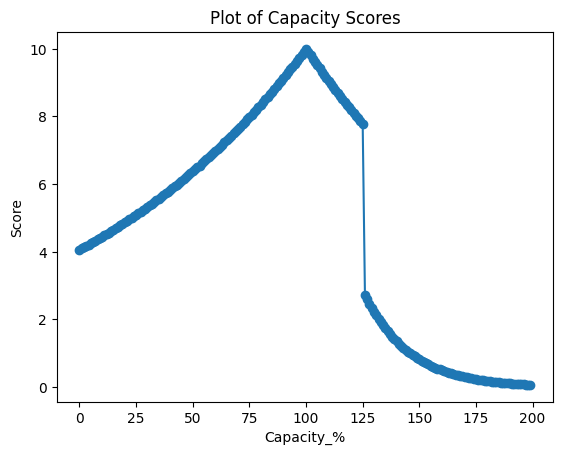

In [ ]:
import matplotlib.pyplot as plt

test_distances = [10, 50, 75, 80, 100, 110, 120, 150, 175, 200]
for td in test_distances:
  print(td)
  print("Distance: " + str(td) + "\n Score: " + str(calculate_score(td)))

test_results = []

for n in range(0,200):
  score = calculate_score(n)
  test_results.append((n, score))

x_values, y_values = zip(*test_results)
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Capacity_%')
plt.ylabel('Score')
plt.title('Plot of Capacity Scores')
plt.show()


In [ ]:
for index, row in capacity_score_df.iterrows():
  capacity_score = calculate_score(row["school_capacity_%"])
  capacity_score_df.loc[index, 'capacity_score'] = capacity_score

# Write to intermediate folder
capacity_score_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Intermediate Data/02 - Education/school_quality_fraser_and_capacity_scores.csv")

capacity_score_df


<ipython-input-63-58b90f664af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capacity_score_df.loc[index, 'capacity_score'] = capacity_score


,capacity_list_school_name,Fraser_list_school_name,matched_VSB_school,school_capacity_%,Fraser_score,electoral_area,capacity_score
0,Crosstown Elementary,Crosstown Elementary,Crosstown Elementary,100.000000,5.3,Vancouver-Yaletown,10.000000
1,Britannia Community Secondary,NaN,Britannia Community Secondary,60.000000,NaN,Vancouver-Strathcona,6.976763
2,Admiral Seymour Elementary,NaN,Admiral Seymour Elementary,37.000000,NaN,Vancouver-Strathcona,5.672246
3,Britannia Community Elementary,NaN,Britannia Community Elementary,107.000000,NaN,Vancouver-Strathcona,9.323938
4,Lord Strathcona Community Elementary,NaN,Lord Strathcona Community Elementary,100.000000,NaN,Vancouver-Strathcona,10.000000
...,...,...,...,...,...,...,...
132,Our Lady of Sorrows,Our Lady of Sorrows Elementary,Our Lady of Sorrows,91.600000,9.8,Vancouver-Hastings,9.271870
133,St Francis of Assisi,St Francis of Assisi Elementary,St Francis of Assisi,96.818182,8.6,Vancouver-Hastings,9.717698
134,St Anthony of Padua,St Anthony of Padua Elementary,St Anthony of Padua,96.363636,9.6,Vancouver-Langara,9.678025
135,St Jude's,St Jude's Elementary,St Jude's,93.636364,10.0,Vancouver-Renfrew,9.443365


## Create csv of scores per electoral area to output as final school quality data

In [ ]:
# Reading the data
import pandas as pd
school_qualities_file = "/content/gdrive/MyDrive/Colab Notebooks/Intermediate Data/02 - Education/school_quality_fraser_and_capacity_scores.csv"
capacity_score_df = pd.read_csv(school_qualities_file)

capacity_score_df

,Unnamed: 0,capacity_list_school_name,Fraser_list_school_name,matched_VSB_school,school_capacity_%,Fraser_score,electoral_area,capacity_score
0,0,Crosstown Elementary,Crosstown Elementary,Crosstown Elementary,100.000000,5.3,Vancouver-Yaletown,10.000000
1,1,Britannia Community Secondary,NaN,Britannia Community Secondary,60.000000,NaN,Vancouver-Strathcona,6.976763
2,2,Admiral Seymour Elementary,NaN,Admiral Seymour Elementary,37.000000,NaN,Vancouver-Strathcona,5.672246
3,3,Britannia Community Elementary,NaN,Britannia Community Elementary,107.000000,NaN,Vancouver-Strathcona,9.323938
4,4,Lord Strathcona Community Elementary,NaN,Lord Strathcona Community Elementary,100.000000,NaN,Vancouver-Strathcona,10.000000
...,...,...,...,...,...,...,...,...
132,132,Our Lady of Sorrows,Our Lady of Sorrows Elementary,Our Lady of Sorrows,91.600000,9.8,Vancouver-Hastings,9.271870
133,133,St Francis of Assisi,St Francis of Assisi Elementary,St Francis of Assisi,96.818182,8.6,Vancouver-Hastings,9.717698
134,134,St Anthony of Padua,St Anthony of Padua Elementary,St Anthony of Padua,96.363636,9.6,Vancouver-Langara,9.678025
135,135,St Jude's,St Jude's Elementary,St Jude's,93.636364,10.0,Vancouver-Renfrew,9.443365


In [ ]:
electoral_areas_mean_capacity_score_df = pd.DataFrame(capacity_score_df.groupby('electoral_area')['capacity_score'].mean())
electoral_areas_mean_capacity_score_df

,capacity_score
electoral_area,
Vancouver-Fraserview,8.604311
Vancouver-Hastings,8.401586
Vancouver-Kensington,8.026090
Vancouver-Langara,9.024876
Vancouver-Little Mountain,7.958397
Vancouver-Point Grey,9.140299
Vancouver-Quilchena,8.506650
Vancouver-Renfrew,8.621786
Vancouver-South Granville,8.316565


In [ ]:
capacity_score_df.groupby('electoral_area')['capacity_score'].mean()

electoral_area
Vancouver-Fraserview         8.604311
Vancouver-Hastings           8.401586
Vancouver-Kensington         8.026090
Vancouver-Langara            9.024876
Vancouver-Little Mountain    7.958397
Vancouver-Point Grey         9.140299
Vancouver-Quilchena          8.506650
Vancouver-Renfrew            8.621786
Vancouver-South Granville    8.316565
Vancouver-Strathcona         7.552169
Vancouver-West End           6.091999
Vancouver-Yaletown           9.390477
Name: capacity_score, dtype: float64

In [ ]:
electoral_areas_median_Fraser_score_df = pd.DataFrame(capacity_score_df.groupby('electoral_area')['Fraser_score'].median())
electoral_areas_median_Fraser_score_df

,Fraser_score
electoral_area,
Vancouver-Fraserview,6.60
Vancouver-Hastings,6.60
Vancouver-Kensington,5.35
Vancouver-Langara,6.40
Vancouver-Little Mountain,7.35
Vancouver-Point Grey,7.70
Vancouver-Quilchena,7.30
Vancouver-Renfrew,8.25
Vancouver-South Granville,7.60


In [ ]:
merged_df = electoral_areas_median_Fraser_score_df.merge(electoral_areas_mean_capacity_score_df, on='electoral_area')

merged_df = merged_df.rename(columns={"Fraser_score": "median_Fraser_score", "capacity_score": "mean_capacity_score"})

merged_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Final Data/electoral_area_with_fraser_and_capacity_scores.csv")


In [ ]:
# TODO write data to final_data